Comparing Cristo_e_la_cananea,_Sebastiano_Ricci_001_damaged_3.jpg


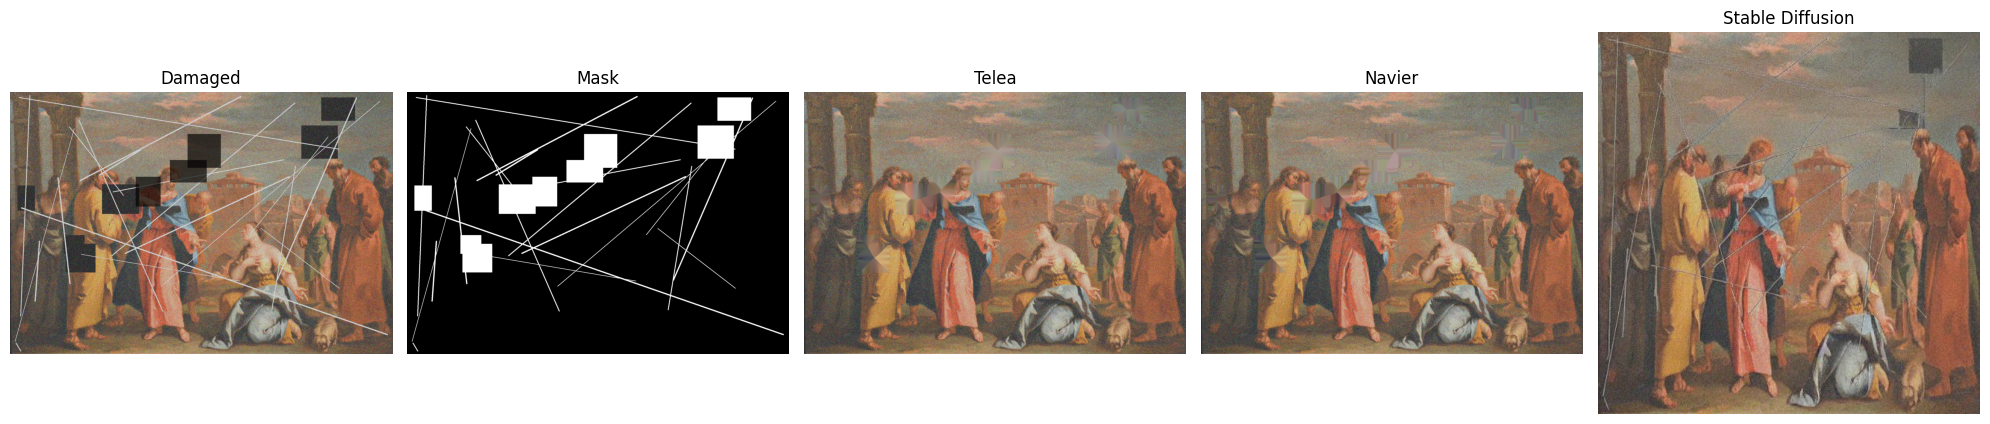

Comparing Cristo_e_la_cananea,_Sebastiano_Ricci_001_damaged_2.jpg


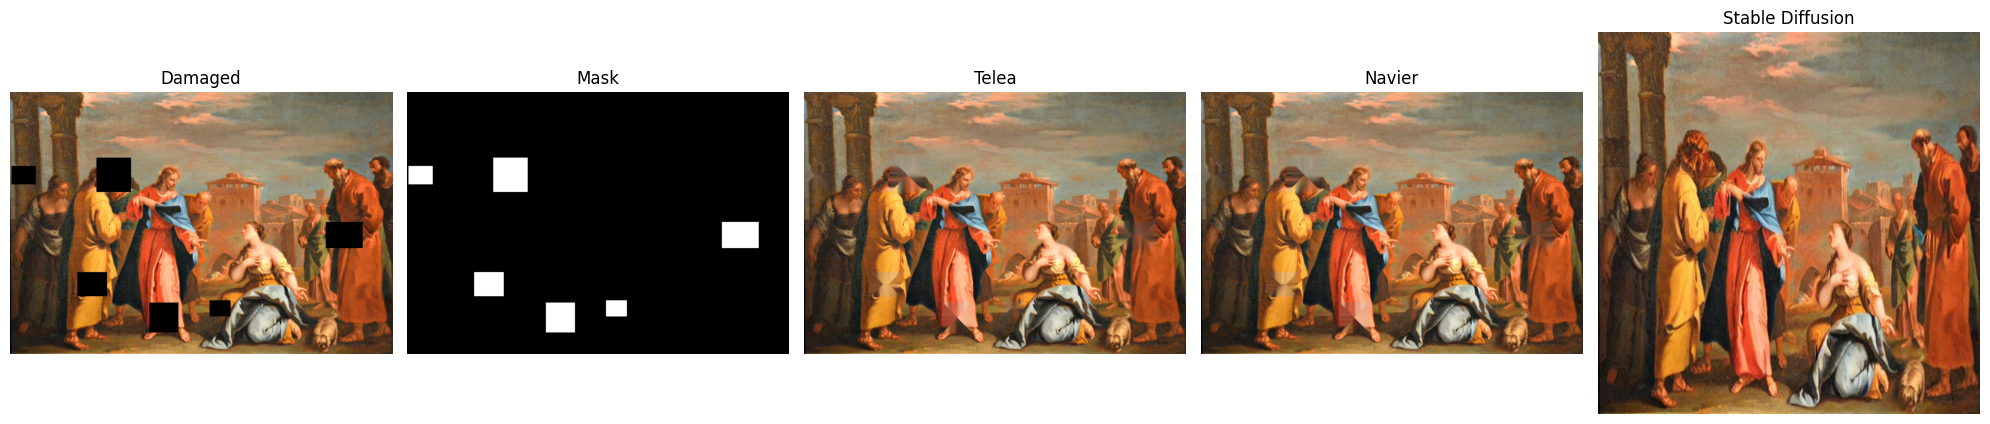

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

DAMAGED_DIR = "../data/damaged"
MASKS_DIR = "../data/masks"
TRAD_RESULTS = "../results/traditional"
DEEP_RESULTS = "../results/deep"

def load_rgb(path):
    """Load an image as RGB (fast fail if not found)."""
    if os.path.exists(path):
        img = cv2.imread(path)
        if img is not None:
            return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return None

def visualize_one(damaged_filename):
    """Visualize Damaged, Mask, Telea, Navier, Stable Diffusion results."""
    mask_file = damaged_filename.replace("damaged", "mask").rsplit(".", 1)[0] + ".png"
    
    paths = {
        "Damaged": os.path.join(DAMAGED_DIR, damaged_filename),
        "Mask": os.path.join(MASKS_DIR, mask_file),
        "Telea": os.path.join(TRAD_RESULTS, damaged_filename.replace("damaged", "telea")),
        "Navier": os.path.join(TRAD_RESULTS, damaged_filename.replace("damaged", "navier")),
        "Stable Diffusion": os.path.join(DEEP_RESULTS, damaged_filename.replace("damaged", "sdxl"))
    }

    images = {
        "Damaged": load_rgb(paths["Damaged"]),
        "Mask": cv2.imread(paths["Mask"], cv2.IMREAD_GRAYSCALE) if os.path.exists(paths["Mask"]) else None,
        "Telea": load_rgb(paths["Telea"]),
        "Navier": load_rgb(paths["Navier"]),
        "Stable Diffusion": load_rgb(paths["Stable Diffusion"])
    }

    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))

    for ax, (title, img) in zip(axs, images.items()):
        if img is not None:
            if title == "Mask":
                ax.imshow(img, cmap="gray")
            else:
                ax.imshow(img)
            ax.set_title(title)
        else:
            ax.text(0.5, 0.5, "Missing", ha="center", va="center", fontsize=10, color="red")
            ax.set_title(title)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Visualize first few damaged examples (limit to 2 for speed)
damaged_files = [f for f in os.listdir(DAMAGED_DIR) if "_damaged_" in f][:2]

for df in damaged_files:
    print(f"Comparing {df}")
    visualize_one(df)
